In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [75]:
# read in csv 
df = pd.read_csv("../Resources/race_data.csv")

In [76]:
# view dataset of mmr stratified by race 
df.head()

,state,state_code,year,race,hispanic_origin,births_by_race,deaths_by_race,mmr_by_race,population_by_race,id,state_abbv,latitude,longitude
0,Alabama,1,2016,Black or African American,Not Hispanic or Latino,17989,14,77.83,0,US.AL,AL,32.318231,-86.902298
1,Alabama,1,2016,White,Not Hispanic or Latino,35319,18,50.96,0,US.AL,AL,32.318231,-86.902298
2,Alabama,1,2017,Black or African American,Not Hispanic or Latino,18354,25,136.21,704201,US.AL,AL,32.318231,-86.902298
3,Alabama,1,2017,White,Not Hispanic or Latino,34784,15,43.12,1655605,US.AL,AL,32.318231,-86.902298
4,Alabama,1,2018,Black or African American,Not Hispanic or Latino,17939,14,78.04,706754,US.AL,AL,32.318231,-86.902298


In [77]:
# binary encoding with preserving all columns
df_binary_encoded = pd.get_dummies(df, columns=["race", "hispanic_origin"])
df_binary_encoded.head()

,state,state_code,year,births_by_race,deaths_by_race,mmr_by_race,population_by_race,id,state_abbv,latitude,longitude,race_Asian or Pacific Islander,race_Black or African American,race_White,hispanic_origin_Hispanic or Latino,hispanic_origin_Not Hispanic or Latino
0,Alabama,1,2016,17989,14,77.83,0,US.AL,AL,32.318231,-86.902298,0,1,0,0,1
1,Alabama,1,2016,35319,18,50.96,0,US.AL,AL,32.318231,-86.902298,0,0,1,0,1
2,Alabama,1,2017,18354,25,136.21,704201,US.AL,AL,32.318231,-86.902298,0,1,0,0,1
3,Alabama,1,2017,34784,15,43.12,1655605,US.AL,AL,32.318231,-86.902298,0,0,1,0,1
4,Alabama,1,2018,17939,14,78.04,706754,US.AL,AL,32.318231,-86.902298,0,1,0,0,1


### Logistic Regression Model

In [78]:
# viewing the range of the mmr data 
agg = df_binary_encoded.agg({"mmr_by_race": ["mean", "median", "max", "min"]})
agg

,mmr_by_race
mean,44.795902
median,36.530000
max,192.680000
min,8.550000


#### Binning the mmr data into low, medium, and high categories

In [156]:
# setting conditions to make outcome categorical
# adjusting bins to make categories more discrete
conditions2 = [
    (df_binary_encoded["mmr_by_race"] <= 20),
    (df_binary_encoded["mmr_by_race"] > 20) & (df_binary_encoded["mmr_by_race"] <= 50),
    (df_binary_encoded["mmr_by_race"] > 50)
    ]

values = ["low", "medium", "high"]

df_binary_encoded["mmr_risk_category"] = np.select(conditions2, values)
df_binary_encoded

,state,state_code,year,births_by_race,deaths_by_race,mmr_by_race,population_by_race,id,state_abbv,latitude,longitude,race_Asian or Pacific Islander,race_Black or African American,race_White,hispanic_origin_Hispanic or Latino,hispanic_origin_Not Hispanic or Latino,mmr_risk_category
0,Alabama,1,2016,17989,14,77.83,0,US.AL,AL,32.318231,-86.902298,0,1,0,0,1,high
1,Alabama,1,2016,35319,18,50.96,0,US.AL,AL,32.318231,-86.902298,0,0,1,0,1,high
2,Alabama,1,2017,18354,25,136.21,704201,US.AL,AL,32.318231,-86.902298,0,1,0,0,1,high
3,Alabama,1,2017,34784,15,43.12,1655605,US.AL,AL,32.318231,-86.902298,0,0,1,0,1,medium
4,Alabama,1,2018,17939,14,78.04,706754,US.AL,AL,32.318231,-86.902298,0,1,0,0,1,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,West Virginia,54,2018,16785,10,59.58,853052,US.WV,WV,38.597626,-80.454903,0,0,1,0,1,high
384,Wisconsin,55,2009,52462,10,19.06,0,US.WI,WI,43.784440,-88.787868,0,0,1,0,1,low
385,Wisconsin,55,2011,50500,10,19.80,0,US.WI,WI,43.784440,-88.787868,0,0,1,0,1,low
386,Wisconsin,55,2014,49440,13,26.29,2409803,US.WI,WI,43.784440,-88.787868,0,0,1,0,1,medium


In [157]:
# viewing how the data is distributed into bins
df_binary_encoded["mmr_risk_category"].value_counts()

medium    184
high      132
low        72
Name: mmr_risk_category, dtype: int64

#### set x and y values

In [158]:
# setting our X and y values for mmr for all races 
XL = df_binary_encoded[["race_Asian or Pacific Islander", "race_Black or African American",
                       "race_White", "hispanic_origin_Hispanic or Latino",
                       "hispanic_origin_Not Hispanic or Latino" 
                       ]]
# removing these features: "births_by_race","deaths_by_race", "population_by_race"
# yL = df_binary_encoded["mmr_risk_category"].values.reshape(-1, 1)
# no reshaping of our y-values necessary 
yL = df_binary_encoded["mmr_risk_category"]
print(XL.shape, yL.shape)
print(yL)

(388, 5) (388,)
0        high
1        high
2        high
3      medium
4        high
        ...  
383      high
384       low
385       low
386    medium
387    medium
Name: mmr_risk_category, Length: 388, dtype: object


#### create train, test split

In [159]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

XL_train, XL_test, yL_train, yL_test = train_test_split(XL, yL, random_state=42)

#### scale data with Standard Scaler

In [160]:
# choosing standard scaler because we know our data has outliers
from sklearn.preprocessing import StandardScaler
XL_scaler = StandardScaler().fit(XL_train)

In [161]:
XL_train_scaled = XL_scaler.transform(XL_train)
XL_test_scaled = XL_scaler.transform(XL_test)

#### scale data with MinMax Scaler

In [57]:
# also tried using MinMax Scaler 
# from sklearn.preprocessing import MinMaxScaler
# XL_scaler = MinMaxScaler().fit(XL_train)

# XL_scaler_train = XL_scaler.transform(XL_train)
# XL_scaler_test = XL_scaler.transform(XL_test)

In [170]:
# create the logistic regression model
from sklearn.linear_model import LogisticRegression
modelL = LogisticRegression(max_iter=1000)
modelL.fit(XL_train_scaled, np.ravel(yL_train))

LogisticRegression(max_iter=1000)

#### Scoring the model on testing and training data

In [172]:
# display r2 for scaled testing and training data
from sklearn.metrics import mean_squared_error

rL_testing = modelL.score(XL_scaler_test, yL_test)
rL_training = modelL.score(XL_scaler_train, yL_train)

print(f"R2 Testing: {rL_testing}") 
print(f"R2 Training: {rL_training}")

R2 Testing: 0.5979381443298969
R2 Training: 0.7594501718213058


#### Confusion matrix 

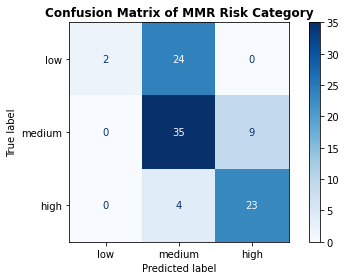

In [177]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = modelL.predict(XL_test_scaled)
cm = confusion_matrix(yL_test, y_pred, labels=values)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=values)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of MMR Risk Category", fontsize=12, fontweight="bold")
plt.tight_layout()

### Analysis
- After doing Linear Regression models, we tried Logistic Regression, converting our y-value to categorical
- We binned our mmr data stratified by race into three categories:
     - Low (MMR <= 20)
     - Medium (MMR  > 20 and <= 50)
     - High (MMR > 50)
- We also experimented with creating distinction between the bins, adjusting the values for the bins. This created a segment of the data that did not fall into any of three bins, so we reverted to using bins that would contain all the data. 
- Our confusion matrix shows that classifying MMR as "medium" risk was most successful, followed by classifying appropriately for "high" risk. 